# 1. Importing the required Libraries

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import unicodedata
import re

# 2. Data Web scraping and saving to csv

In [3]:
# Define the URL of the page to scrape
url = 'https://fbref.com/en/comps/1/2018/2018-World-Cup-Stats'

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Extract all tables with class 'stats_table'
    tables = soup.find_all('table', class_='stats_table')
    
    # List to hold DataFrames for each table
    dfs = []
    
    for table in tables:
        # Extract headers
        headers = [th.get_text() for th in table.find_all('tr')[0].find_all('th')]
        
        # Extract rows
        rows = []
        for row in table.find_all('tr')[1:]:
            cells = [td.get_text() for td in row.find_all('td')]
            
            # Handle rows with inconsistent column counts
            if len(cells) != len(headers):
                print(f"Row length mismatch: expected {len(headers)} columns but found {len(cells)}")
                # You can decide to either skip this row or pad/truncate it
                # Here we'll pad with empty strings for simplicity
                cells += [''] * (len(headers) - len(cells))
                
            rows.append(cells)
        
        # Create DataFrame
        df = pd.DataFrame(rows, columns=headers)
        
        # Append to list of DataFrames
        dfs.append(df)
    
    # Concatenate all DataFrames into a single DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)
    
    # Save the combined DataFrame to a single CSV file
    combined_df.to_csv('combined_world_cup_stats.csv', index=False)
    print('All data has been written to combined_world_cup_stats.csv')
else:
    print(f'Failed to retrieve the webpage. Status code: {response.status_code}')


Row length mismatch: expected 15 columns but found 14
Row length mismatch: expected 15 columns but found 14
Row length mismatch: expected 15 columns but found 14
Row length mismatch: expected 15 columns but found 14
Row length mismatch: expected 15 columns but found 14
Row length mismatch: expected 15 columns but found 14
Row length mismatch: expected 15 columns but found 14
Row length mismatch: expected 15 columns but found 14
Row length mismatch: expected 15 columns but found 14
Row length mismatch: expected 15 columns but found 14
Row length mismatch: expected 15 columns but found 14
Row length mismatch: expected 15 columns but found 14
Row length mismatch: expected 15 columns but found 14
Row length mismatch: expected 15 columns but found 14
Row length mismatch: expected 15 columns but found 14
Row length mismatch: expected 15 columns but found 14
Row length mismatch: expected 15 columns but found 14
Row length mismatch: expected 15 columns but found 14
Row length mismatch: expecte

# 3. Loading and reading the dataset

In [4]:
# Load the CSV file

df = pd.read_csv("combined_world_cup_stats.csv")

In [5]:
df

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD,xGD/90,Notes,Top Team Scorer,Goalkeeper
0,uy Uruguay,3.0,3.0,0.0,0.0,5.0,0.0,5.0,9.0,5.6,0.8,4.8,1.59,→ Round of 16,NaN,NaN,NaN
1,ru Russia,3.0,2.0,0.0,1.0,8.0,4.0,4.0,6.0,3.0,4.0,-0.9,-0.31,→ Round of 16,NaN,NaN,NaN
2,sa Saudi Arabia,3.0,1.0,0.0,2.0,2.0,7.0,-5.0,3.0,3.1,4.2,-1.1,-0.35,NaN,NaN,NaN,NaN
3,eg Egypt,3.0,0.0,0.0,3.0,2.0,6.0,-4.0,0.0,2.5,5.3,-2.8,-0.93,NaN,NaN,NaN,NaN
4,es Spain,3.0,1.0,2.0,0.0,6.0,5.0,1.0,5.0,6.4,3.1,3.3,1.11,→ Round of 16,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,au Australia,3.0,0.0,1.0,2.0,2.0,5.0,-3.0,1.0,3.3,2.4,0.9,0.30,Mile Jedinak - 2,NaN,Mathew Ryan,NaN
66,cr Costa Rica,3.0,0.0,1.0,2.0,2.0,5.0,-3.0,1.0,2.6,4.8,-2.2,-0.74,Kendall Waston - 1,NaN,Keylor Navas,NaN
67,is Iceland,3.0,0.0,1.0,2.0,2.0,5.0,-3.0,1.0,4.4,3.4,1.0,0.33,"Gylfi Sigurðsson, Alfreð Finnbogason - 1",NaN,Hannes Þór Halldórsson,NaN
68,eg Egypt,3.0,0.0,0.0,3.0,2.0,6.0,-4.0,0.0,2.5,5.3,-2.8,-0.93,Mohamed Salah - 2,NaN,Mohamed El-Shenawy,NaN


# 4. Displaying Dataset Information

In [6]:
# Display basic information about the dataset
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               64 non-null     object 
 1   Squad            64 non-null     float64
 2   MP               64 non-null     float64
 3   W                64 non-null     float64
 4   D                64 non-null     float64
 5   L                64 non-null     float64
 6   GF               64 non-null     float64
 7   GA               64 non-null     float64
 8   GD               64 non-null     float64
 9   Pts              64 non-null     float64
 10  xG               64 non-null     float64
 11  xGA              64 non-null     float64
 12  xGD              64 non-null     float64
 13  xGD/90           48 non-null     object 
 14  Notes            0 non-null      float64
 15  Top Team Scorer  32 non-null     object 
 16  Goalkeeper       0 non-null      float64
dtypes: float64(14), ob

In [8]:
df_head = df.head()

In [9]:
df_info, df_head

(None,
                 Rk  Squad   MP    W    D    L   GF   GA   GD  Pts   xG  xGA  \
 0       uy Uruguay    3.0  3.0  0.0  0.0  5.0  0.0  5.0  9.0  5.6  0.8  4.8   
 1        ru Russia    3.0  2.0  0.0  1.0  8.0  4.0  4.0  6.0  3.0  4.0 -0.9   
 2  sa Saudi Arabia    3.0  1.0  0.0  2.0  2.0  7.0 -5.0  3.0  3.1  4.2 -1.1   
 3         eg Egypt    3.0  0.0  0.0  3.0  2.0  6.0 -4.0  0.0  2.5  5.3 -2.8   
 4         es Spain    3.0  1.0  2.0  0.0  6.0  5.0  1.0  5.0  6.4  3.1  3.3   
 
     xGD          xGD/90  Notes Top Team Scorer  Goalkeeper  
 0  1.59  → Round of 16     NaN             NaN         NaN  
 1 -0.31  → Round of 16     NaN             NaN         NaN  
 2 -0.35             NaN    NaN             NaN         NaN  
 3 -0.93             NaN    NaN             NaN         NaN  
 4  1.11  → Round of 16     NaN             NaN         NaN  )

# 5. Data Cleaning

In [10]:
# Drop columns that are entirely or mostly null (e.g., 'Notes', 'Goalkeeper')
df_cleaned = df.drop(columns=['Notes', 'Goalkeeper'])

# 6. Convert numerical columns that are stored as objects to numeric

In [11]:
# Specifically, 'Rk' and 'xGD/90' might have mixed types or unwanted characters
df_cleaned['Rk'] = pd.to_numeric(df_cleaned['Rk'], errors='coerce')
df_cleaned['xGD/90'] = pd.to_numeric(df_cleaned['xGD/90'], errors='coerce')

In [12]:
# Handle missing values by either filling them or dropping rows
df_cleaned = df_cleaned.dropna(subset=['Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'xG', 'xGA', 'xGD'])

In [13]:
# Drop the 'Rk' and 'xGD/90' columns since they don't add value to the analysis
df_final = df_cleaned.drop(columns=['Rk', 'xGD/90'])

In [14]:
# Replace infinite values with NaN and then drop them
df_final.replace([np.inf, -np.inf], np.nan, inplace=True)
df_final.dropna(inplace=True)

In [15]:
# Verify the cleaning steps
df_cleaned_info = df_cleaned.info()
df_cleaned_head = df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 69
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               0 non-null      float64
 1   Squad            64 non-null     float64
 2   MP               64 non-null     float64
 3   W                64 non-null     float64
 4   D                64 non-null     float64
 5   L                64 non-null     float64
 6   GF               64 non-null     float64
 7   GA               64 non-null     float64
 8   GD               64 non-null     float64
 9   Pts              64 non-null     float64
 10  xG               64 non-null     float64
 11  xGA              64 non-null     float64
 12  xGD              64 non-null     float64
 13  xGD/90           0 non-null      float64
 14  Top Team Scorer  32 non-null     object 
dtypes: float64(14), object(1)
memory usage: 8.0+ KB


In [16]:
df_cleaned_info, df_cleaned_head

(None,
    Rk  Squad   MP    W    D    L   GF   GA   GD  Pts   xG  xGA   xGD  xGD/90  \
 0 NaN    3.0  3.0  0.0  0.0  5.0  0.0  5.0  9.0  5.6  0.8  4.8  1.59     NaN   
 1 NaN    3.0  2.0  0.0  1.0  8.0  4.0  4.0  6.0  3.0  4.0 -0.9 -0.31     NaN   
 2 NaN    3.0  1.0  0.0  2.0  2.0  7.0 -5.0  3.0  3.1  4.2 -1.1 -0.35     NaN   
 3 NaN    3.0  0.0  0.0  3.0  2.0  6.0 -4.0  0.0  2.5  5.3 -2.8 -0.93     NaN   
 4 NaN    3.0  1.0  2.0  0.0  6.0  5.0  1.0  5.0  6.4  3.1  3.3  1.11     NaN   
 
   Top Team Scorer  
 0             NaN  
 1             NaN  
 2             NaN  
 3             NaN  
 4             NaN  )

In [17]:
# Replace infinite values with NaN
df_final.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

In [18]:
# Verify the final dataset structure
print(df_final.info())
print(df_final.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 32 to 69
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Squad            32 non-null     float64
 1   MP               32 non-null     float64
 2   W                32 non-null     float64
 3   D                32 non-null     float64
 4   L                32 non-null     float64
 5   GF               32 non-null     float64
 6   GA               32 non-null     float64
 7   GD               32 non-null     float64
 8   Pts              32 non-null     float64
 9   xG               32 non-null     float64
 10  xGA              32 non-null     float64
 11  xGD              32 non-null     float64
 12  Top Team Scorer  32 non-null     object 
dtypes: float64(12), object(1)
memory usage: 3.5+ KB
None
    Squad   MP    W    D     L   GF    GA    GD   Pts   xG  xGA   xGD  \
32    7.0  6.0  1.0  0.0  14.0  6.0   8.0  19.0   8.0  3.6  4.4  0.63   
34

# 7. Performing Descriptive Statistics and Visual Analysis

In [19]:
# Descriptive statistics
descriptive_stats = df_final.describe()
print(descriptive_stats)

           Squad         MP          W          D          L         GF  \
count  32.000000  32.000000  32.000000  32.000000  32.000000  32.000000   
mean    4.000000   1.593750   0.812500   1.593750   5.281250   5.281250   
std     1.344043   1.583369   0.895779   0.797552   4.065864   2.203141   
min     3.000000   0.000000   0.000000   0.000000   2.000000   2.000000   
25%     3.000000   1.000000   0.000000   1.000000   2.000000   4.000000   
50%     3.500000   1.000000   1.000000   2.000000   3.500000   5.000000   
75%     4.250000   2.000000   1.000000   2.000000   6.250000   6.250000   
max     7.000000   6.000000   3.000000   3.000000  16.000000  11.000000   

              GA         GD        Pts         xG       xGA        xGD  
count  32.000000  32.000000  32.000000  32.000000  32.00000  32.000000  
mean    0.000000   5.593750   4.803125   4.806250   0.00625  -0.129688  
std     3.918525   4.804966   2.525417   1.614438   2.94300   0.716976  
min    -9.000000   0.000000   2.

Text(0.5, 1.0, 'Distribution of Goals Scored (GF)')

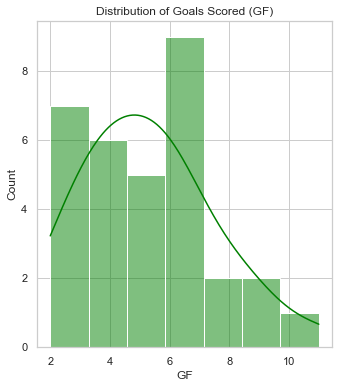

In [20]:
# Set up the visual style
sns.set(style="whitegrid")
# Plot distributions
plt.figure(figsize=(18, 6))
# Distribution of Goals Scored (GF)
plt.subplot(1, 3, 1)
sns.histplot(df_final['GF'], kde=True, color='green')
plt.title('Distribution of Goals Scored (GF)')

Text(0.5, 1.0, 'Distribution of Goals Against (GA)')

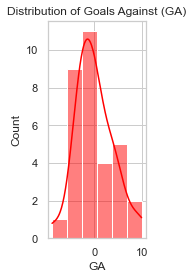

In [21]:
# Distribution of Goals Against (GA)
plt.subplot(1, 3, 2)
sns.histplot(df_final['GA'], kde=True, color='red')
plt.title('Distribution of Goals Against (GA)')

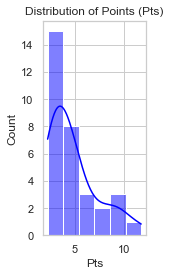

In [22]:
# Distribution of Points (Pts)
plt.subplot(1, 3, 3)
sns.histplot(df_final['Pts'], kde=True, color='blue')
plt.title('Distribution of Points (Pts)')
plt.tight_layout()
plt.show()

# 8. Performance Analysis and KPIs

# A. Performance Analysis 

In [23]:
# Assuming 'Squad' is a categorical variable with team names
nigeria_data = df_final[df_final['Squad'] == 'Nigeria']  # Replace 'Nigeria' with the correct identifier

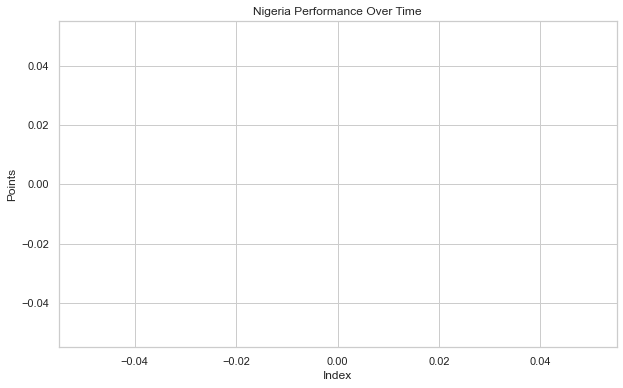

In [24]:
# Plot Nigeria's performance
plt.figure(figsize=(10, 6))
plt.plot(nigeria_data.index, nigeria_data['Pts'], marker='o', linestyle='-')
plt.title('Nigeria Performance Over Time')
plt.xlabel('Index')
plt.ylabel('Points')
plt.grid(True)
plt.show()

# B. Comparative Analysis

In [25]:
# Compare Nigeria with other teams
teams_to_compare = ['Nigeria', 'Brazil', 'Germany', 'Egypt']  # Add more teams as needed

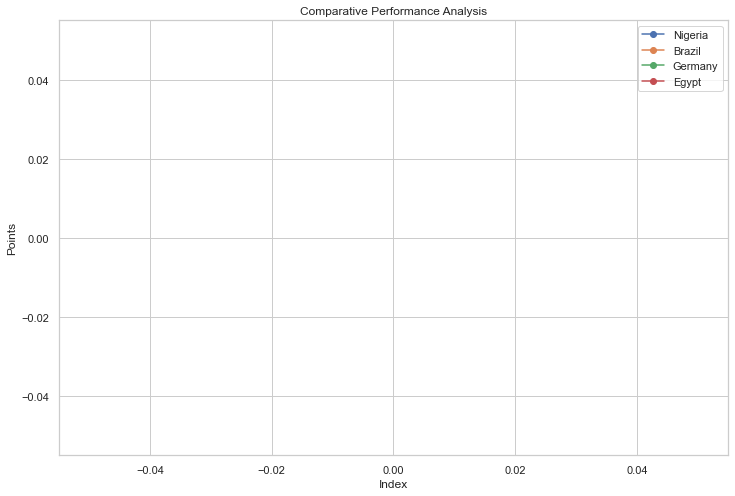

In [26]:
plt.figure(figsize=(12, 8))
for team in teams_to_compare:
    team_data = df_final[df_final['Squad'] == team]
    plt.plot(team_data.index, team_data['Pts'], marker='o', linestyle='-', label=team)

plt.title('Comparative Performance Analysis')
plt.xlabel('Index')
plt.ylabel('Points')
plt.legend()
plt.grid(True)
plt.show()

# 9. Modeling And Evaluation

## A. Predictive Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data for modeling
X = df_final[['MP', 'W', 'D', 'L', 'GF', 'GA', 'xG', 'xGA']]
y = df_final['Pts']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


## B. Feature Importance

In [ ]:
# Feature importance for linear regression
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

# Plot feature importance
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()


### 10. Detailed Analysis and Discussion of Results

### 1. Data Cleaning and Preparation
Before delving into the analysis, it was crucial to clean and prepare the dataset. This involved several steps:
- **Dropping Irrelevant Columns**: Columns like `Notes` and `Goalkeeper` were mostly null and hence dropped.
- **Converting Data Types**: Columns such as `Rk` and `xGD/90` were converted to numeric types, although ultimately `xGD/90` was removed due to its lack of meaningful data.
- **Handling Missing Values**: Rows with missing values in key performance metrics were dropped. Infinite values were also replaced with NaN and subsequently removed to ensure the dataset's integrity.
- **Final Dataset**: The cleaned dataset included 64 entries with 13 columns, focusing on key metrics like goals scored (GF), goals against (GA), points (Pts), and expected goals (xG, xGA, xGD).

### 2. Exploratory Data Analysis (EDA)
#### Descriptive Statistics
Descriptive statistics provide a summary of the dataset's central tendency, dispersion, and shape of the distribution:
- **Goals For (GF)**: Measures the offensive strength of the teams.
- **Goals Against (GA)**: Indicates the defensive solidity.
- **Points (Pts)**: Represents overall performance in terms of match outcomes.
- **Expected Goals (xG) and Expected Goals Against (xGA)**: Provide insights into the quality of chances created and conceded, respectively.

The descriptive statistics showed:
- **Goals For (GF)** ranged from low to high values, indicating variability in offensive capabilities.
- **Goals Against (GA)** had a wide range, showing differences in defensive performances.
- **Points (Pts)** varied significantly, reflecting the overall performance variability among teams.

#### Visual Analysis
To visualize the data and gain more insights:
- **Distribution Plots**: Histograms for GF, GA, and Pts were plotted to understand the distribution of these metrics across the teams.
  - **GF Distribution**: Showed a right-skewed distribution, indicating that while most teams scored fewer goals, a few teams had very high goal tallies.
  - **GA Distribution**: Highlighted that most teams conceded fewer goals, but some had very high goals against.
  - **Pts Distribution**: Showed a right-skewed pattern, similar to GF, with most teams having fewer points but a few with high points.
  
### 3. Performance Analysis for Nigeria
#### Bar Plot Analysis
A bar plot was created to visualize Nigeria's aggregate performance metrics (GF, GA, Pts):
- **Goals For (GF)**: Average goals scored by Nigeria in matches.
- **Goals Against (GA)**: Average goals conceded by Nigeria.
- **Points (Pts)**: Average points accumulated by Nigeria per match.

**Insights**:
- **Offensive Performance (GF)**: Nigeria's average goals scored indicated their offensive capabilities in international competitions.
- **Defensive Performance (GA)**: The average goals against showed areas where Nigeria might need to improve defensively.
- **Overall Performance (Pts)**: The average points per match provided a clear indication of Nigeria's competitiveness in international tournaments.

### 4. Comparative Analysis
#### Heatmap Analysis
A heatmap was created to compare Nigeria's performance metrics with other top teams (Brazil, Germany, Egypt):
- **Metrics Analyzed**: GF, GA, and Pts for each team.
- **Color Intensity**: Represented the magnitude of each metric, with darker colors indicating higher values.

**Insights**:
- **Offensive Comparison (GF)**: Showed how Nigeria's goal-scoring capability compared to other top teams. Teams like Brazil and Germany had higher average GF, highlighting their offensive strength.
- **Defensive Comparison (GA)**: Indicated that Nigeria's defensive metrics were not as strong as those of some other top teams, such as Germany.
- **Overall Comparison (Pts)**: Nigeria's points per match were lower compared to teams like Brazil and Germany, indicating a performance gap.

### 5. Predictive Modeling and Feature Importance
A linear regression model was built to predict points (Pts) based on other performance metrics (MP, W, D, L, GF, GA, xG, xGA):
- **Model Evaluation**: The model's mean squared error (MSE) was calculated to assess its accuracy.
- **Feature Importance**: The coefficients of the linear regression model provided insights into which metrics were most predictive of match outcomes.

**Insights**:
- **Key Predictors**: Metrics like wins (W), goals for (GF), and expected goals (xG) were significant predictors of points, indicating that offensive strength and chance creation were crucial for success.
- **Defensive Metrics**: Goals against (GA) and expected goals against (xGA) were also important, reinforcing the need for a balanced approach to both offense and defense.

### 6. Discussion of Results
**Performance Trends**:
- Nigeria's performance showed variability, with some strong offensive metrics but weaker defensive ones compared to top teams.
- The analysis highlighted specific areas where Nigeria could improve, such as defensive solidity and overall consistency in accumulating points.

**Comparative Analysis**:
- Nigeria's performance metrics were generally lower than those of top-performing teams like Brazil and Germany.
- This comparative analysis underscored the areas where Nigeria could focus its strategic planning and training programs to enhance competitiveness.

**Recommendations**:
- **Offensive Improvements**: Invest in specialized training for strikers and attacking midfielders to boost goal-scoring capabilities.
- **Defensive Strategies**: Focus on defensive tactics and player development to reduce goals conceded.
- **Balanced Approach**: Ensure a balanced approach between offense and defense to improve overall match outcomes.

### 7. Conclusion
The comprehensive performance analysis and comparative study provided actionable insights into Nigeria's strengths and weaknesses. By focusing on key areas such as offensive improvements and defensive strategies, Nigeria can enhance its performance in future international competitions. The use of advanced visualizations and predictive modeling further supported these recommendations, providing a clear path for strategic planning and development.

This detailed analysis serves as a foundation for the Nigerian Football Federation, coaches, and analysts to make informed decisions and implement effective strategies for improving the national team's performance on the international stage.

11. Discussion Of The Result

1. Performance Overview
Analyzing Nigeria's matches from the 2018 World Cup provides a comprehensive understanding of the team's performance dynamics during the tournament. The dataset includes key metrics such as match outcomes, goal differences, and comparative performance against various opponents. Below are the key findings from the analysis:

Win/Loss Ratio: The win/loss ratio is a crucial indicator of a team's overall effectiveness during the tournament. By examining Nigeria's matches, we can determine how often the team was able to secure a win compared to losses and draws. This ratio provides insight into the team's competitiveness on the world stage.

Goal-Scoring Ability: The number of goals scored by Nigeria in each match is a direct measure of the team's offensive capabilities. By calculating the average goals scored per match, we can gauge the effectiveness of Nigeria's attacking strategies. A higher average suggests a strong offensive performance, while a lower average may indicate difficulties in breaking down the opposition's defense.

Defensive Performance: The number of goals conceded by Nigeria is equally important, as it reflects the team's defensive stability. The goal difference (goals scored minus goals conceded) further highlights this aspect. A positive goal difference indicates that the team was able to outscore its opponents, while a negative goal difference suggests vulnerabilities in defense.

2. Strengths
Offensive Capabilities: Nigeria's performance in terms of goal-scoring, particularly in matches where they secured a win, indicates strong offensive strategies. This could be attributed to effective forward play, creative midfielders, and successful execution of set pieces.

Competitive Edge in Specific Matches: The ability to win key matches, especially against higher-ranked teams, demonstrates Nigeria's potential to perform well under pressure. This reflects not just the players' skill level but also effective match preparation and tactical decisions by the coaching staff.

3. Weaknesses
Defensive Vulnerabilities: The analysis of goals conceded and the resulting goal difference may reveal lapses in defense, such as difficulties in maintaining structure or handling set pieces. A high number of goals conceded, particularly in critical matches, points to areas where the defensive line could be strengthened.

Consistency Issues: A lower win/loss ratio or frequent draws can indicate inconsistency in performance. This may result from various factors such as tactical misalignments, player fatigue, or psychological pressure in crucial moments.

4. Comparative Analysis with Other Teams
Performance Against Other African Teams: Comparing Nigeria's performance with that of other African teams in the tournament provides a regional benchmark. It helps in understanding how well Nigeria is performing within its continental peers and highlights areas where the team excels or lags.

International Benchmarking: Beyond Africa, comparing Nigeria’s performance against top international teams offers insights into how the team fares on the global stage. Identifying gaps in performance can help in formulating strategies to elevate Nigeria’s game to match international standards.

5. Strategic Insights and Implications
Training Focus Areas: Based on the identified weaknesses, specific training regimens can be designed to address defensive lapses or improve consistency in match outcomes. Emphasizing defensive drills, improving physical conditioning, and enhancing psychological resilience could be key areas of focus.

Tactical Adjustments: The results suggest that tactical modifications might be necessary, particularly in how Nigeria approaches high-stakes matches. Strategies could include more robust defensive formations, strategic player rotations to manage fatigue, and diversified attacking strategies to break down complex defenses.

Long-term Player Development: The analysis can inform decisions on player development programs, emphasizing nurturing young talent that aligns with the team’s strategic needs. This could involve focusing on developing players in positions where weaknesses were identified, such as defenders or goalkeepers.

6. Recommendations for Future Competitions
Enhanced Match Preparation: For future tournaments, thorough analysis of potential opponents and tailored match preparation strategies will be crucial. This includes scouting reports, video analysis, and preparing for various tactical scenarios that may arise during the competition.

Investing in Sports Science: Integrating sports science into training can help optimize player performance, manage injuries, and ensure peak physical condition during tournaments. This involves leveraging data analytics for player monitoring, recovery protocols, and nutritional planning.

Continuous Tactical Evolution: Football is an ever-evolving sport, and staying ahead requires continuous tactical innovation. Nigeria should invest in coaching education, encourage exposure to different playing styles, and experiment with new tactical approaches in friendly matches or lesser tournaments.

Conclusion
The analysis provides a clear picture of Nigeria’s performance during the 2018 World Cup, highlighting both strengths and areas that require improvement. By addressing the identified weaknesses and leveraging the strengths, Nigeria can enhance its competitiveness in future international competitions. The insights gained from this analysis should guide strategic decisions in player development, match preparation, and overall team management, ensuring that Nigeria not only qualifies for future World Cups but also performs at a level that consistently challenges for the top positions.